# Spotify Streaming Data


### Links / Ref
* [Medium Post by a tech guy](https://towardsdatascience.com/explore-your-activity-on-spotify-with-r-and-spotifyr-how-to-analyze-and-visualize-your-stream-dee41cb63526)


### Insights we want to generate (from design exercise)

Ref to [Figma file](https://www.figma.com/file/DRInHAgMfztR0X0IHxfijg/Everything!?node-id=428%3A55) for design aspect of this

* Top 5 songs of the month
* Top 5 artists of the month
* Number of hours listened to per day / week (a trend line over months)
* Genres based on time of the day (morning, noon, night) 
* Songs & Artists based on time of the day (morning, noon, night)
* Flow of songs/genre in a particular day i.e. sequence of songs / artist
* This time last year, I was listening to...
* Top artists & tracks

### Human level insights

I am interested to see

* what I used to listen to back in 2010 and what I listen to now
* How many hours I listen to during the morning hours, noon hours and night hours
* How my genre taste have changed over time

In [1]:
import pandas as pd

In [2]:
to_seconds = 1000
to_minutes = 60 * to_seconds
to_hours = 60 * to_minutes
to_days = to_hours * 24

#------
pd.options.display.max_rows = 4000

In [3]:
df = pd.read_csv('neat_data/streaming_data_all.csv', encoding='utf-8')

/Users/i536332/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
print(df.shape)
print('-----'* 10)
print(df.dtypes)

(49252, 34)
--------------------------------------------------
Unnamed: 0                             int64
ts                                    object
username                              object
platform                              object
ms_played                              int64
conn_country                          object
ip_addr_decrypted                     object
user_agent_decrypted                  object
master_metadata_track_name            object
master_metadata_album_artist_name     object
master_metadata_album_album_name      object
spotify_track_uri                     object
episode_name                          object
episode_show_name                     object
spotify_episode_uri                   object
reason_start                          object
reason_end                            object
shuffle                                 bool
skipped                              float64
offline                              float64
offline_timestamp                    

In [5]:
df.head()

,Unnamed: 0,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,...,metro_code,longitude,latitude,year,month,day,hour,minute,seconds,time
0,0,2016-01-08 05:59:53+00:00,kaizer1v,Linux [x86-64 0],127988,IN,122.167.81.128,unknown,In2,WSTRN,...,0.0,0.0,0.0,2016,1,8,5,59,53,05:59:53
1,1,2018-05-08 11:00:12+00:00,kaizer1v,Linux [x86-64 0],300983,IN,1.22.230.239,unknown,Set My Mind - Luttrell Remix,Way Out West,...,NaN,NaN,NaN,2018,5,8,11,0,12,11:00:12
2,2,2014-01-02 09:05:03+00:00,kaizer1v,Windows 7 (6.1.7601; x64; SP1; S),99763,IN,199.43.186.25,unknown,White Diamonds (Ray Mang Remix),Friendly Fires,...,0.0,0.0,0.0,2014,1,2,9,5,3,09:05:03
3,3,2015-05-27 06:22:17+00:00,kaizer1v,Windows 7 (6.1.7601; x64; SP1; S),9144,IN,103.245.74.5,unknown,Tempted - Dennis Sheperd Remix,Markus Schulz,...,0.0,0.0,0.0,2015,5,27,6,22,17,06:22:17
4,4,2019-07-19 08:46:09+00:00,kaizer1v,OS X 10.14.5 [x86 8],379533,IN,223.237.246.17,unknown,Angel,Massive Attack,...,NaN,NaN,NaN,2019,7,19,8,46,9,08:46:09


In [13]:
df['ts'] = pd.to_datetime(df['ts'])

In [14]:
df.sort_values(by='ts', ascending=False)

,Unnamed: 0,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,...,metro_code,longitude,latitude,year,month,day,hour,minute,seconds,time
10528,10528,2021-03-09 11:10:36+00:00,kaizer1v,OS X 10.16.0 [x86 8],325760,IN,103.109.144.9,unknown,Reset,Mutemath,...,NaN,NaN,NaN,2021,3,9,11,10,36,11:10:36
46196,4839,2021-03-09 11:03:22+00:00,kaizer1v,OS X 10.16.0 [x86 8],208146,IN,103.109.144.9,unknown,Cavalries,Mutemath,...,NaN,NaN,NaN,2015,9,5,16,58,53,16:58:53
34594,5685,2021-03-09 10:59:54+00:00,kaizer1v,OS X 10.16.0 [x86 8],183826,IN,103.109.144.9,unknown,Blood Pressure,Mutemath,...,NaN,NaN,NaN,2014,5,5,5,22,12,05:22:12
39325,10416,2021-03-09 10:56:49+00:00,kaizer1v,OS X 10.16.0 [x86 8],234800,IN,103.109.144.9,unknown,Changes,Mutemath,...,NaN,NaN,NaN,2014,10,19,17,56,56,17:56:56
35120,6211,2021-03-09 10:52:42+00:00,kaizer1v,OS X 10.16.0 [x86 8],2517,IN,103.109.144.9,unknown,Typical,Mutemath,...,NaN,NaN,NaN,2016,4,22,18,12,9,18:12:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27141,12671,2010-05-11 01:52:14+00:00,kaizer1v,Wine 1.0.1 [x86 0],260895,GB,82.35.202.186,NaN,This Is The New Shit,Marilyn Manson,...,0.0,0.0,0.0,2014,8,31,17,39,52,17:39:52
31132,2223,2010-05-11 01:47:54+00:00,kaizer1v,Wine 1.0.1 [x86 0],194718,GB,82.35.202.186,NaN,Streets of Philadelphia,Bruce Springsteen,...,0.0,0.0,0.0,2019,11,27,10,42,42,10:42:42
162,162,2010-05-11 01:44:39+00:00,kaizer1v,Wine 1.0.1 [x86 0],218821,GB,82.35.202.186,NaN,Come As You Are,Nirvana,...,0.0,0.0,0.0,2010,5,11,1,44,39,01:44:39
19675,5205,2010-05-11 01:40:27+00:00,kaizer1v,Wine 1.0.1 [x86 0],337567,GB,82.35.202.186,NaN,Madagascar,Guns N' Roses,...,0.0,0.0,0.0,2013,5,30,9,41,49,09:41:49


# Track Trails

_Flow of songs/genre in a particular day i.e. sequence of songs / artist_

* Example: for **2013-03-25**, shown below, you'll see that I listened from **18:09** to **20:37** a series of tracks mainly containing MC Yogi tracks.. Seems like I was in a `bhakt` state of mind. :)
* I listened to a total of `2.3` hours

In [40]:
dd = '2013-08-15'

trail_df = df.set_index('ts').loc[dd:dd].sort_values(by='ts').reset_index()
trail_df[['ts', 'ms_played', 'skipped', 'reason_start', 'reason_end', 'master_metadata_track_name', 'master_metadata_album_artist_name']]

/Users/i536332/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  This is separate from the ipykernel package so we can avoid doing imports until


,ts,ms_played,skipped,reason_start,reason_end,master_metadata_track_name,master_metadata_album_artist_name
0,2013-08-15 06:25:24+00:00,264880,0.0,popup,trackdone,Standing On The Shore,Empire of the Sun
1,2013-08-15 06:30:00+00:00,275906,0.0,trackdone,trackdone,Luv Deluxe,Cinnamon Chasers
2,2013-08-15 06:34:22+00:00,261173,0.0,trackdone,trackdone,Jetstreams,Cinnamon Chasers
3,2013-08-15 06:38:57+00:00,274285,0.0,trackdone,trackdone,The Day That Never Came,Cinnamon Chasers
4,2013-08-15 06:45:58+00:00,389291,0.0,trackdone,trackdone,Space Quest,Cinnamon Chasers
...,...,...,...,...,...,...,...
121,2013-08-15 21:13:37+00:00,350866,0.0,trackdone,trackdone,The Great Gig In The Sky - Live,Pink Floyd
122,2013-08-15 21:14:43+00:00,65314,0.0,trackdone,trackdone,Speak To Me - 2011 Remastered Version,Pink Floyd
123,2013-08-15 21:17:06+00:00,111631,0.0,trackdone,trackdone,Eclipse - 2011 Remastered Version,Pink Floyd
124,2013-08-15 21:22:52+00:00,345973,0.0,trackdone,trackdone,Careful With That Axe Eugene - 1996 Remastered...,Pink Floyd


In [42]:
trail_df['mins_played'] = trail_df['ms_played'] / to_minutes

In [43]:
trail_df.sort_values(by='time', ascending=True)

,ts,Unnamed: 0,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,...,longitude,latitude,year,month,day,hour,minute,seconds,time,mins_played
117,2013-08-15 20:41:22+00:00,12591,kaizer1v,Windows XP (5.1.2600; x86; SP3; S),92748,IN,114.143.88.52,unknown,The Happiest Days Of Our Lives - 2011 Remaster...,Pink Floyd,...,0.0,0.0,2013,7,14,0,1,42,00:01:42,1.545800
61,2013-08-15 15:27:33+00:00,676,kaizer1v,Windows 7 (6.1.7601; x64; SP1; S),207840,IN,115.241.176.95,unknown,Babel,Mumford & Sons,...,0.0,0.0,2019,5,3,3,45,37,03:45:37,3.464000
46,2013-08-15 14:39:09+00:00,10967,kaizer1v,Windows 7 (6.1.7601; x64; SP1; S),276453,IN,115.241.176.95,unknown,Of Monsters And Heroes And Men,James,...,0.0,0.0,2020,3,31,4,13,12,04:13:12,4.607550
119,2013-08-15 20:57:42+00:00,8622,kaizer1v,Windows XP (5.1.2600; x86; SP3; S),516226,IN,114.143.88.52,unknown,Run Like Hell - Live,Pink Floyd,...,0.0,0.0,2017,11,1,4,19,21,04:19:21,8.603767
43,2013-08-15 14:25:51+00:00,3283,kaizer1v,Windows 7 (6.1.7601; x64; SP1; S),292800,IN,115.241.176.95,unknown,I Wanna Be Adored - Remastered,The Stone Roses,...,0.0,0.0,2019,2,6,4,53,26,04:53:26,4.880000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2013-08-15 20:39:49+00:00,8400,kaizer1v,Windows XP (5.1.2600; x86; SP3; S),379359,IN,114.143.88.52,unknown,Comfortably Numb - 2011 Remastered Version,Pink Floyd,...,0.0,0.0,2013,8,15,20,39,49,20:39:49,6.322650
80,2013-08-15 17:50:22+00:00,2739,kaizer1v,Windows XP (5.1.2600; x86; SP3; S),24391,IN,114.143.88.52,unknown,Círculo en el Río,Gustavo Santaolalla,...,0.0,0.0,2015,12,29,20,45,18,20:45:18,0.406517
120,2013-08-15 21:07:12+00:00,7182,kaizer1v,Windows XP (5.1.2600; x86; SP3; S),569400,IN,114.143.88.52,unknown,Comfortably Numb - Live,Pink Floyd,...,0.0,0.0,2013,8,15,21,7,12,21:07:12,9.490000
122,2013-08-15 21:14:43+00:00,2285,kaizer1v,Windows XP (5.1.2600; x86; SP3; S),65314,IN,114.143.88.52,unknown,Speak To Me - 2011 Remastered Version,Pink Floyd,...,0.0,0.0,2013,8,15,21,14,43,21:14:43,1.088567


<AxesSubplot:xlabel='master_metadata_track_name'>

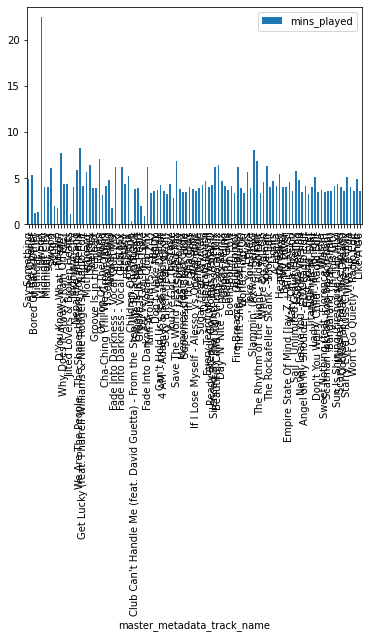

In [15]:
trail_df.plot(kind='bar', x='master_metadata_track_name', y='mins_played')

# Top Artists (number of hours listened to)

In [8]:
top_artists_df = (df.groupby('master_metadata_album_artist_name')['ms_played'].sum() / to_hours).sort_values(ascending=False).head(10)
print(top_artists_df)

master_metadata_album_artist_name
Empire of the Sun    61.992764
Ulrich Schnauss      59.192486
Stereophonics        41.072311
Phoenix              40.288645
Oasis                38.484418
Cinnamon Chasers     33.598952
Moderat              27.714724
Matt Lange           21.070779
Daft Punk            20.426638
Linkin Park          20.192116
Name: ms_played, dtype: float64


In [9]:
top_artists_df.reset_index()['master_metadata_album_artist_name'].to_list()

['Empire of the Sun',
 'Ulrich Schnauss',
 'Stereophonics',
 'Phoenix',
 'Oasis',
 'Cinnamon Chasers',
 'Moderat',
 'Matt Lange',
 'Daft Punk',
 'Linkin Park']

<AxesSubplot:xlabel='master_metadata_album_artist_name'>

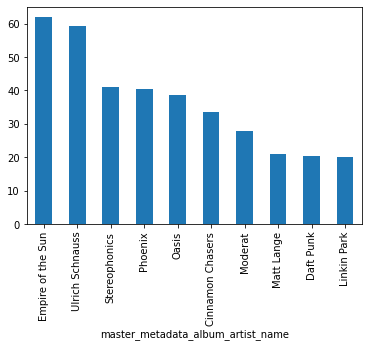

In [10]:
top_artists_df.plot(kind='bar')

## Top Artists yearly

In [11]:
top_artists_yearly = (df.groupby([df['ts'].dt.year, 'master_metadata_album_artist_name'])['ms_played'].sum() / to_hours).sort_values(ascending=False)
top_artists_yearly

ts    master_metadata_album_artist_name
2013  Empire of the Sun                    38.343603
      Cinnamon Chasers                     26.286761
2014  Ulrich Schnauss                      24.373204
2013  Stereophonics                        23.330384
2014  Phoenix                              16.793609
                                             ...    
2015  Scatman John                          0.000000
2020  Angels & Airwaves                     0.000000
2017  Epic45                                0.000000
2015  Dimitri Nakov                         0.000000
      Counting Crows                        0.000000
Name: ms_played, Length: 11385, dtype: float64

## Top Trails

total hours streamed per day

In [34]:
day_trails_df = (df.groupby(df['ts'].dt.date)['ms_played'].sum() / to_hours).reset_index()

In [35]:
day_trails_df['ms_played'].mean()

1.4164370888195894

In [36]:
day_trails_df.sort_values(by='ms_played', ascending=False).head(20)

,ts,ms_played
120,2013-08-15,8.545261
228,2013-12-31,7.642900
242,2014-04-07,6.789370
482,2015-04-16,6.686076
141,2013-09-12,6.663777
4,2013-03-26,6.510822
142,2013-09-13,6.468718
1121,2018-02-27,6.371223
1062,2017-12-07,6.228200
565,2015-08-14,6.199173


In [38]:
day_trails_df.sort_values(by='ms_played', ascending=True).head(5)

,ts,ms_played
605,2015-11-01,0.000000
66,2013-06-15,0.000283
102,2013-07-27,0.000284
867,2017-01-25,0.000531
1895,2021-01-27,0.000628


In [21]:
df['year'] = df['ts'].dt.year
df['month'] = df['ts'].dt.month
df['day'] = df['ts'].dt.day
df['hour'] = df['ts'].dt.hour
df['minute'] = df['ts'].dt.minute
df['seconds'] = df['ts'].dt.second
df['time'] = df['ts'].dt.time
df['date'] = df['ts'].dt.date
df['day_of_week'] = df.ts.dt.dayofweek   # 0 = Monday & 6 = Sunday

In [17]:
# start date
start = df['ts'].min()

# most recent date
recent = df['ts'].max()

print(start, '-----', recent)

2010-05-11 01:26:17+00:00 ----- 2021-03-09 11:10:36+00:00


## Top Tracks of All Time

by number of hours streamed

_If I were to listen to "Blessed - Original Club Mix" song on loop - it would have heard it for 14.5 hours_

In [11]:
df.groupby('master_metadata_track_name')['ms_played'].sum().sort_values(ascending=False).head(10) / to_hours

master_metadata_track_name
Blessed - Original Club Mix                          14.429259
Dakota                                               13.066485
We Are The People - The Shapeshifters Vocal Remix    10.363956
Milk                                                 10.314069
Hallelujah - An Ode to a Sunny Day                    9.075491
Rewind                                                8.951875
Standing On The Shore                                 8.206252
Who Feels Love?                                       7.600620
… Passing By                                          7.124639
Lisztomania                                           7.022169
Name: ms_played, dtype: float64

In [150]:
agg_1 = df.groupby(['year', 'master_metadata_track_name']).agg({'ms_played': sum}) / to_hours
agg_1['ms_played'].groupby(['year'], group_keys=False).nlargest(5)

In [151]:
agg_1

ms_played
year master_metadata_track_name                                   
2010 21st Century                                         0.060188
     All Over Again - Blu Mar Ten - Tom Middleton Remix   0.019121
     Angel On My Shoulder - EDX Radio Edit                0.014799
     Bring It On Home                                     0.016678
     Come As You Are                                      0.060784
...                                                            ...
2021 downstate                                            0.072396
     go with u - Louis La Roche Remix                     0.028712
     piano un1 arpej                                      0.013984
     recourse                                             0.066504
     snow day                                             0.026875

[32407 rows x 1 columns]

## Top Artists by Year

by number of hours streamed

* I got introduced to Empire of the Sun in 2013 - ever since it became my top artist
* 2013 is when I boosted my listening time on Spotify
* Ulrich Schnauss is also one of my top artists along with Matt Lange

## Top Tracks by Year

* Stereophonics, a british band which I discovered in 2013 had a great track called `Dakota` which still is the most heard song until now - for a total of 9 hours continuously
* 

In [46]:
songs_agg = df.groupby(['year', 'master_metadata_track_name']).agg({'ms_played': sum}) / to_hours
songs_agg['ms_played'].groupby(['year'], group_keys=False).nlargest(5)

year  master_metadata_track_name                       
2010  The Ghosts of Beverly Drive - Tycho Remix            0.086666
      Rewind                                               0.079518
      Heaven                                               0.075941
      No Love                                              0.070833
      Come As You Are                                      0.060784
2011  A Dark Knight                                        0.187761
      Thousands Of Sounds                                  0.144208
      Bad Year Blimp - Original Mix                        0.135971
      Mojito - Original Mix                                0.129109
      Put Your Hands Up In The Air - Main Mix              0.124909
2013  Dakota                                               4.709284
      We Are The People - The Shapeshifters Vocal Remix    3.759678
      Hallelujah - An Ode to a Sunny Day                   3.084974
      Standing On The Shore                                2

## Top Albums by Year

* Anjunabeats became my favourite in 2015 and ever since has been in the top albums. Deep house seems to be the favourite genre
* Nothing beats Ice on the Dune by Empire of the Sun. Totally heard it for 1054 minutes i.e. 17 hours

In [216]:
songs_agg = df.groupby(['year', 'master_metadata_album_artist_name']).agg({'ms_played': sum}) / to_hours
songs_agg['ms_played'].groupby(['year'], group_keys=False).nlargest(5)

year  master_metadata_album_artist_name
2010  Death Cab for Cutie                   0.086666
      Stereophonics                         0.079518
      Warrant                               0.075941
      Hooray For Earth                      0.070833
      Nirvana                               0.060784
2011  Hans Zimmer                           0.187761
      Shingo Nakamura                       0.144208
      Matt Lange                            0.135971
      David Akermanis                       0.129109
      Clubworxx & Jerry Ropero              0.124909
2013  Empire of the Sun                    19.754046
      Cinnamon Chasers                     12.156505
      Stereophonics                        12.089171
      Ulrich Schnauss                      10.475862
      Phoenix                              10.153588
2014  Ulrich Schnauss                      12.663239
      Phoenix                               8.684745
      Stereophonics                         7.752782
      

## Artist Trend Over the Years

In [15]:
artist_name = 'Empire of the Sun'

<AxesSubplot:xlabel='year'>

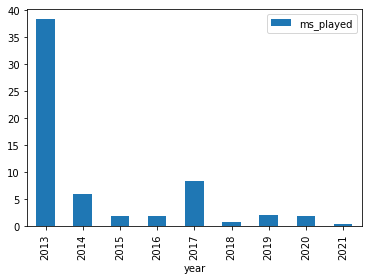

In [16]:
(df[df['master_metadata_album_artist_name'] == artist_name].groupby('year').agg({'ms_played': sum}) / to_hours).reset_index().plot.bar(x='year', y='ms_played')

## Album Trend Over the Years

In [17]:
album_name = 'Anjunabeats'

In [44]:
album_df = df[df['master_metadata_album_album_name'].str.contains(album_name) == True]

<AxesSubplot:xlabel='year'>

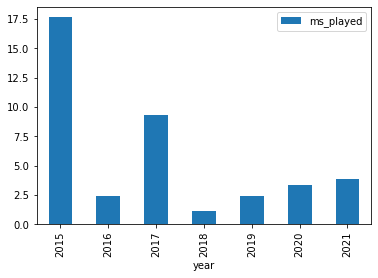

In [48]:
(album_df.groupby('year').agg({'ms_played': sum}) / to_hours).reset_index().plot.bar(x='year', y='ms_played')

# Time Based Analysis

* Weekday vs Weekend Trends
* Morning vs Noon vs Evening

## Most Streamed Months

<AxesSubplot:xlabel='month'>

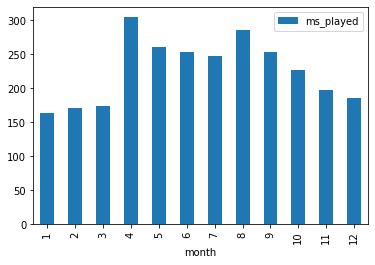

In [60]:
(df.groupby('month').agg({'ms_played': sum}) / to_hours).reset_index().plot.bar(x='month', y='ms_played')

## Most Streamed Days of the Month

<AxesSubplot:xlabel='day'>

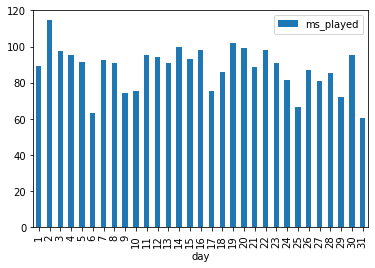

In [61]:
(df.groupby('day').agg({'ms_played': sum}) / to_hours).reset_index().plot.bar(x='day', y='ms_played')

## Most Streamed Days of the Week

* Tuesdays are the most streamed across the years - with a total of 20 days non-stop

In [16]:
df.groupby('day_of_week').agg({'ms_played': sum}) / to_days

,ms_played
day_of_week,
0,16.844880
1,19.879923
2,17.384347
3,17.802038
4,18.023291
5,11.440466
6,12.176095


<AxesSubplot:xlabel='day_of_week'>

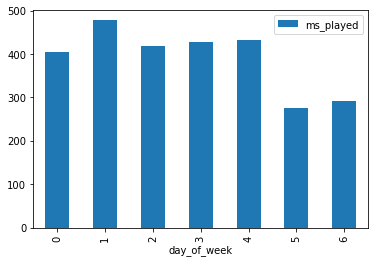

In [64]:
(df.groupby('day_of_week').agg({'ms_played': sum}) / to_hours).reset_index().plot.bar(x='day_of_week', y='ms_played')

## Most Streamed Hours of the Day

* Turns out I stream music mostly during the mornings - like to start the day fairly well 9-10 AM :)
* Afternoons are pretty chill
* Evenings again I start listening to music

### TODO

* Correlation b/w time of the day vs Weekday/Weekend
* 

<AxesSubplot:xlabel='hour'>

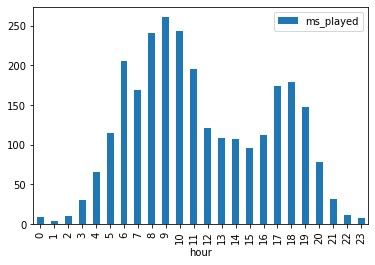

In [6]:
(df.groupby('hour').agg({'ms_played': sum}) / to_hours).reset_index().plot.bar(x='hour', y='ms_played')

## Stream Time per Day

* I have streamed ~42 minutes a day between **11th May, 2010** and **9th March, 2021**
* I listen to 1.4 hours per day for all the days I have streamed (excluding no-stream days)

In [48]:
(df['date'].max() - df['date'].min()).days

3955

In [50]:
# total number of unique days
unique_days = df['date'].nunique()

total_hours_streamed = df['ms_played'].sum() / to_hours
total_minutes_streamed = df['ms_played'].sum() / to_minutes

In [37]:
total_hours_streamed / unique_days

1.416437088819589

In [51]:
total_minutes_streamed / (df['date'].max() - df['date'].min()).days

41.343488630425625

## Listening Path (Artist)

An artist graph made by the patterns of your listening

In [59]:
df_2020 = df[df['year'] == 2020]
df_2020.sort_values('ts')['master_metadata_album_artist_name']

12268    Spanish Guitar Lounge Music
13352                      Yoke Lore
11894                  Hazel English
10657                         Barrie
6097               Albert Hammond Jr
                    ...             
14379                Michael Jackson
773                     Toni Simonen
4016                       Timbaland
13610                     Geographer
4020                           alt-J
Name: master_metadata_album_artist_name, Length: 4473, dtype: object

# ------------------------------------------------------------------------

## Max Stream

The longest I have streamed a song is for 15 hours; non-stop - "Blessed - Original Club Mix"

In [148]:
df.groupby('master_metadata_track_name')['ms_played'].sum().sort_values(ascending=False).head(10) / to_hours

master_metadata_track_name
Blessed - Original Club Mix                          14.429259
Dakota                                               13.066485
We Are The People - The Shapeshifters Vocal Remix    10.363956
Milk                                                 10.314069
Hallelujah - An Ode to a Sunny Day                    9.075491
Rewind                                                8.951875
Standing On The Shore                                 8.206252
Who Feels Love?                                       7.600620
… Passing By                                          7.124639
Lisztomania                                           7.022169
Name: ms_played, dtype: float64

In [149]:
tracks = df.groupby(['master_metadata_track_name', 'year'])['ms_played'].sum().sort_values(ascending=False).reset_index()
tracks['hours'] = tracks['ms_played'] / to_hours
tracks

,master_metadata_track_name,year,ms_played,hours
0,Blessed - Original Club Mix,2014,20384888,5.662469
1,Dakota,2013,16953422,4.709284
2,Continuous DJ Mix,2020,15365785,4.268274
3,We Are The People - The Shapeshifters Vocal Remix,2013,13534840,3.759678
4,Rewind,2014,12717201,3.532556
...,...,...,...,...
32402,Analog Degradation,2017,0,0.000000
32403,You'll Disappear - Munk Remix (Unmixed),2016,0,0.000000
32404,We Only Come Out At Night,2014,0,0.000000
32405,Can’t Get Better than this (Original Version),2018,0,0.000000


# Monthly streaming

In [82]:
sel_year = 2014
sel_year_df = df[df['year'] == sel_year]

In [85]:
(sel_year_df.groupby(df['ts'].dt.month)['ms_played'].sum() / to_hours).reset_index().apply(pd.np.ceil)

/Users/i536332/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


,ts,ms_played
0,1.0,21.0
1,2.0,17.0
2,3.0,17.0
3,4.0,50.0
4,5.0,39.0
5,6.0,38.0
6,7.0,31.0
7,8.0,35.0
8,9.0,39.0
9,10.0,39.0


In [102]:
yearly_weekly_df = sel_year_df.groupby(df['ts'].dt.hour)['ms_played'].sum() / to_hours

In [103]:
yearly_weekly_df

ts
0      0.413380
1      0.508355
2      1.577978
3      2.571492
4      6.757729
5     12.972271
6     25.631631
7     22.273995
8     39.158521
9     37.501021
10    33.573037
11    28.378213
12    17.699295
13    13.999183
14    14.164049
15    11.772619
16    14.469241
17    19.713132
18    24.167021
19    18.850849
20    11.401213
21     7.839634
22     1.486970
23     0.556376
Name: ms_played, dtype: float64

# ----------------------------------------------------------------------------

In [11]:
def yearly_month_dist(df, year, save=False):
    '''
    given an year get monthly hours streamed
    '''
    year_df = df[df['year'] == year]
    to_return = (year_df.groupby(year_df['ts'].dt.month)['ms_played'].sum() / to_hours).reset_index().apply(pd.np.ceil)
    to_return['year'] = year
    if save:
        to_return.to_json(year + '_monthly_dist.json', orient='records')
    return to_return


def yearly_top_10(df, year, top_col='master_metadata_album_artist_name', save=False):
    '''
    for a given year, get top 5 artists
    '''
    year_df = df[df['year'] == year]
    to_return = (year_df.groupby([top_col, 'year', 'master_metadata_album_artist_name'])['ms_played'].sum() / to_hours).sort_values(ascending=False).head(10)
    if save:
        to_return.to_json(year + '_top_'+ top_col +'.json', orient='records')
    return to_return.reset_index()
        

def yearly_top_trails(df, year, save=False):
    '''
    for a given year, get the top stream
    '''
    year_df = df[df['year'] == year]
    trails_df = df.groupby(df['ts'].dt.date).agg({'ms_played': sum}) / to_hours
    trails_df['ms_played'].groupby(['year'], group_keys=False).nlargest(5)
    
    # trails_df = (df.groupby(df['ts'].dt.date)['ms_played'].sum() / to_hours).reset_index()
    # to_return = trails_df.sort_values(by='ms_played', ascending=False).head(5)
    if save:
        to_return.to_json(year + '_top_trails.json', orient='records')
    return to_return

    
def yearly_clock(df, year, save=False):
    '''
    get clock hour stream distribution
    '''
    year_df = df[df['year'] == year]
    to_return = (year_df.groupby(df['hour'])['ms_played'].sum() / to_hours).reset_index().apply(pd.np.ceil)
    to_return['year'] = year
    if save:
        to_return.to_json(year + '_clock.json', orient='records')
    return to_return
    

## Generate JSONs

In [12]:
appened_df = []
for y in range(2014, 2021):
    appened_df.append(yearly_clock(df, year=y))
#     appened_df.append(yearly_month_dist(df, year=y))
    
final_df = pd.concat(appened_df, ignore_index=True)

/Users/i536332/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


In [13]:
final_df

,hour,ms_played,year
0,4.0,1.0,2014
1,5.0,10.0,2014
2,6.0,27.0,2014
3,7.0,20.0,2014
4,8.0,51.0,2014
5,9.0,53.0,2014
6,10.0,50.0,2014
7,11.0,44.0,2014
8,12.0,21.0,2014
9,13.0,16.0,2014


In [14]:
final_df.to_json('yearly_clocks.json', orient='records')

In [155]:

'''
2013-08-15	8.545261

2014-04-07	6.789370

2015-04-16	6.686076

2016-08-19	5.067656

2017-12-07	6.228200

2018-02-27	6.371223

2019-02-18	6.074981

2020-04-12	5.182162
'''

Series([], Name: ms_played, dtype: float64)

In [179]:
trail_dates = [
'2013-08-15',
'2014-04-07',
'2015-04-16',
'2016-08-19',
'2017-12-07',
'2018-02-27',
'2019-02-18',
'2020-04-12']

In [180]:
df = df.reset_index()

for dd in trail_dates:

#     dd = '2013-08-15'

    trail_df = df.set_index('ts').loc[dd:dd].sort_values(by='ts').reset_index()
    trail_df[['ts', 'ms_played', 'skipped', 'reason_start', 'reason_end', 'master_metadata_track_name', 'master_metadata_album_artist_name']]
    trail_df.to_json('trail_' + dd + '.json', orient='records')

/Users/i536332/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  import sys


In [177]:
trail_df.to_json('trail_2013-08-15.json', orient='records')